# WeatherPy

## Analyze the weather data of 500 cities chosen at random 

---

## Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Plots to Showcase the Relationship Between Weather Variables and Latitude

### The OpenWeatherMap API retrieves weather data from the generated list of cities

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mukah
City not found. Skipping...
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | fort st. john
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | champerico
Processing Record 11 of Set 1 | ulladulla
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | yugorsk
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | alotau
City not found. Skipping...
Processing Record 20 of Set 1 | haiku-pauwela
Processing Recor

Processing Record 40 of Set 4 | georgetown
Processing Record 41 of Set 4 | chonchi
Processing Record 42 of Set 4 | al hazm
Processing Record 43 of Set 4 | inhambane
Processing Record 44 of Set 4 | ola
Processing Record 45 of Set 4 | eyl
Processing Record 46 of Set 4 | kabompo
Processing Record 47 of Set 4 | punta arenas
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | praia da vitoria
Processing Record 0 of Set 5 | craig
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | fonadhoo
City not found. Skipping...
Processing Record 3 of Set 5 | ulsteinvik
Processing Record 4 of Set 5 | ploudalmezeau
Processing Record 5 of Set 5 | kegen
Processing Record 6 of Set 5 | sterling
Processing Record 7 of Set 5 | onega
Processing Record 8 of Set 5 | prince george
Processing Record 9 of Set 5 | remire-montjoly
Processing Record 10 of Set 5 | grand haven
Processing Record 11 of Set 5 | sant antoni de portmany
Processing Record 12 of Set 5 | zabrat
Processing R

Processing Record 33 of Set 8 | barra do garcas
Processing Record 34 of Set 8 | san antonio de pale
Processing Record 35 of Set 8 | dunedin
Processing Record 36 of Set 8 | port saint john's
Processing Record 37 of Set 8 | pottsville
Processing Record 38 of Set 8 | santa vitoria do palmar
Processing Record 39 of Set 8 | pathein
Processing Record 40 of Set 8 | magadan
Processing Record 41 of Set 8 | binh long
City not found. Skipping...
Processing Record 42 of Set 8 | monahans
Processing Record 43 of Set 8 | natal
Processing Record 44 of Set 8 | calchaqui
Processing Record 45 of Set 8 | laojunmiao
Processing Record 46 of Set 8 | puerto rico
Processing Record 47 of Set 8 | nar'yan-mar
Processing Record 48 of Set 8 | villamontes
Processing Record 49 of Set 8 | dolbeau-mistassini
Processing Record 0 of Set 9 | serdar
Processing Record 1 of Set 9 | nova vicosa
Processing Record 2 of Set 9 | fort bragg
Processing Record 3 of Set 9 | lodwar
Processing Record 4 of Set 9 | maine soroa
Processing

Processing Record 27 of Set 12 | afif
Processing Record 28 of Set 12 | sur
Processing Record 29 of Set 12 | sosnogorsk
Processing Record 30 of Set 12 | kapuskasing
Processing Record 31 of Set 12 | villa general belgrano
Processing Record 32 of Set 12 | poxoreo
Processing Record 33 of Set 12 | uliastay
Processing Record 34 of Set 12 | taulaga
Processing Record 35 of Set 12 | teknaf
Processing Record 36 of Set 12 | riberalta
Processing Record 37 of Set 12 | cruzeiro do sul
Processing Record 38 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 39 of Set 12 | puerto deseado
Processing Record 40 of Set 12 | amqui
Processing Record 41 of Set 12 | taroudant
Processing Record 42 of Set 12 | mohacs
Processing Record 43 of Set 12 | kukmor
Processing Record 44 of Set 12 | kuanda
Processing Record 45 of Set 12 | zeribet el oued
Processing Record 46 of Set 12 | bhamo
Processing Record 47 of Set 12 | mangai
Processing Record 48 of Set 12 | mumford
Processing Record 49 of Set 12 | 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,80.33,78,40,8.05,US,1691635221
1,iqaluit,63.7506,-68.5145,42.53,100,100,10.36,CA,1691635251
2,adamstown,-25.0660,-130.1015,66.79,56,84,21.94,PN,1691635216
3,codrington,-38.2667,141.9667,54.10,73,100,14.34,AU,1691635251
4,ushuaia,-54.8000,-68.3000,40.66,70,40,2.30,AR,1691635213


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,80.33,78,40,8.05,US,1691635221
1,iqaluit,63.7506,-68.5145,42.53,100,100,10.36,CA,1691635251
2,adamstown,-25.0660,-130.1015,66.79,56,84,21.94,PN,1691635216
3,codrington,-38.2667,141.9667,54.10,73,100,14.34,AU,1691635251
4,ushuaia,-54.8000,-68.3000,40.66,70,40,2.30,AR,1691635213


### Scatter Plots

#### Latitude Vs. Temperature

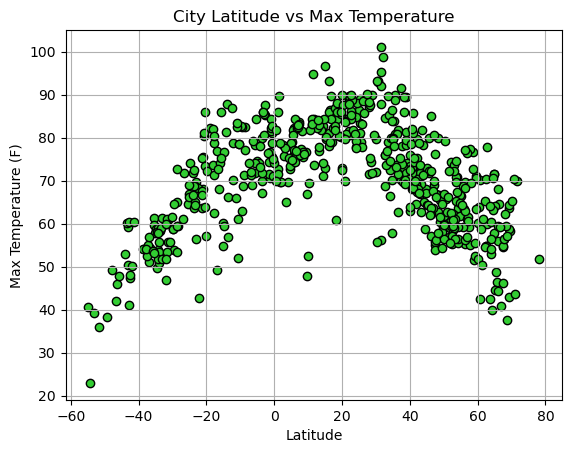

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="limegreen", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

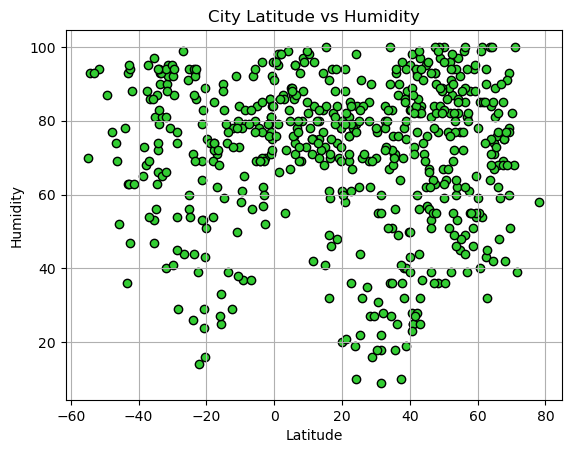

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="limegreen", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

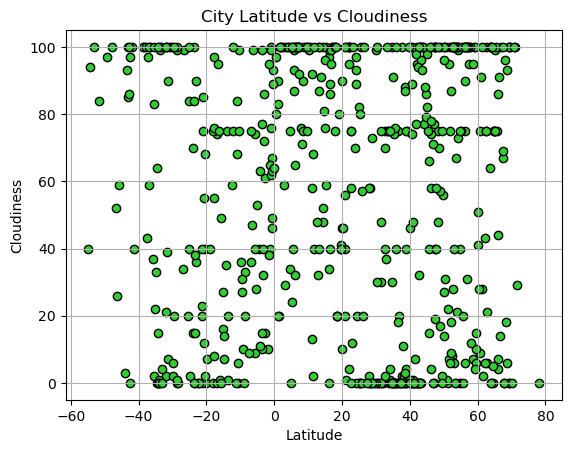

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="limegreen", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

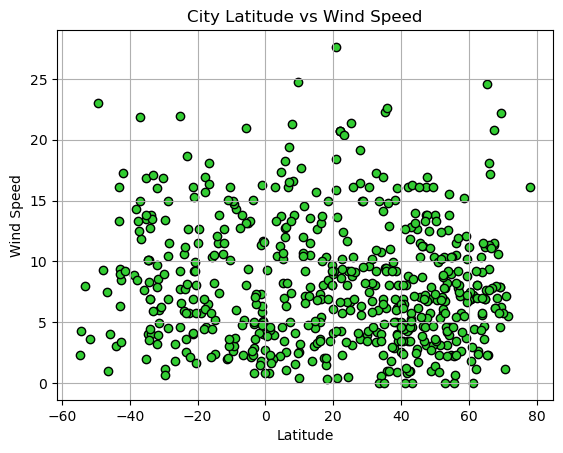

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="limegreen", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Linear Regression Computations for Each Relationship


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,80.33,78,40,8.05,US,1691635221
1,iqaluit,63.7506,-68.5145,42.53,100,100,10.36,CA,1691635251
6,fort st. john,56.2499,-120.8529,69.69,49,75,11.50,CA,1691635063
8,champerico,14.3000,-91.9167,82.58,77,48,4.74,GT,1691635251
10,badger,64.8000,-147.5333,71.51,74,75,6.91,US,1691635252


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,66.79,56,84,21.94,PN,1691635216
3,codrington,-38.2667,141.9667,54.10,73,100,14.34,AU,1691635251
4,ushuaia,-54.8000,-68.3000,40.66,70,40,2.30,AR,1691635213
5,hithadhoo,-0.6000,73.0833,81.05,75,67,5.06,MV,1691634971
7,grytviken,-54.2811,-36.5092,22.93,93,94,4.29,GS,1691635206


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.6581099942677816.
The linear regression model is y = -0.4x + 86.81


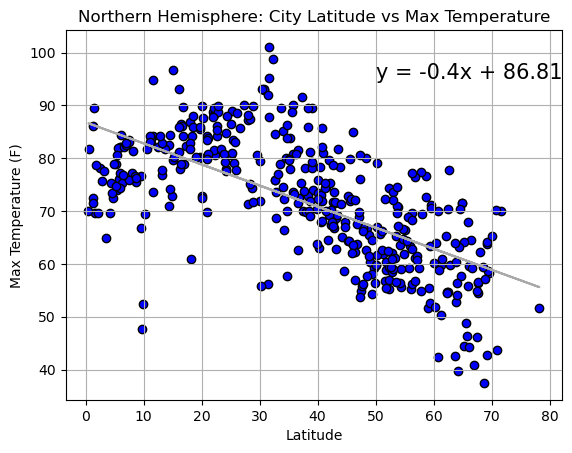

In [60]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_n = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r value is {rvalue}.")

plt.scatter(x_values, y_values, marker="o", color="blue", edgecolors="black")
plt.plot(x_values, regress_values, color="darkgrey")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: City Latitude vs Max Temperature')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')
plt.annotate(line_eq_n,(50,95),fontsize=15,color="black")
print(f'The linear regression model is {line_eq_n}')

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r value is 0.809393152669383.
The linear regression model is y = 0.71x + 81.31


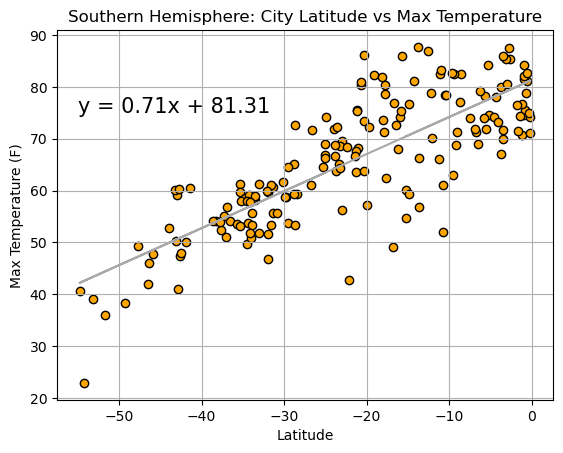

In [59]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r value is {rvalue}.")

plt.scatter(x_values, y_values, marker="o", color="orange", edgecolors="black")
plt.plot(x_values, regress_values, color="darkgrey")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: City Latitude vs Max Temperature')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')
plt.annotate(line_eq_s,(-55,75),fontsize=15,color="black")
print(f'The linear regression model is {line_eq_s}')

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a correlation between the max temperature and latitude of the cities. Reviewing the northern and southern hemisphere plots, the further a city is from the equator (0 degree latitude), moving either north or south, the lower it's max temperature is likely to be. 

### Humidity vs. Latitude Linear Regression Plot

The r value is -0.06782743992348711.
The linear regression model is y = -0.07x + 73.78


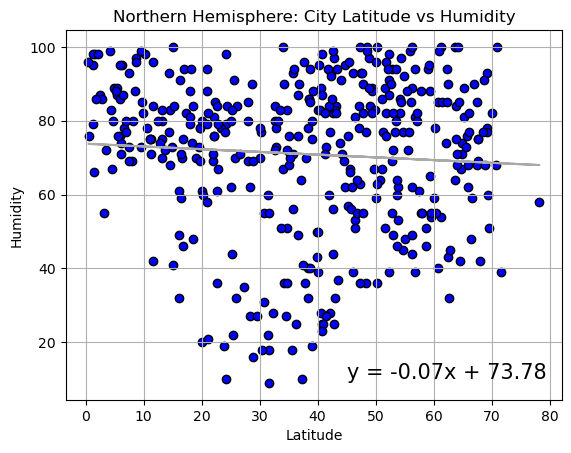

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_n = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r value is {rvalue}.")

plt.scatter(x_values, y_values, marker="o", color="blue", edgecolors="black")
plt.plot(x_values, regress_values, color="darkgrey")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: City Latitude vs Humidity')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')
plt.annotate(line_eq_n,(45,10),fontsize=15,color="black")
print(f'The linear regression model is {line_eq_n}')

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

The r value is -0.05911554431696837.
The linear regression model is y = -0.08x + 69.78


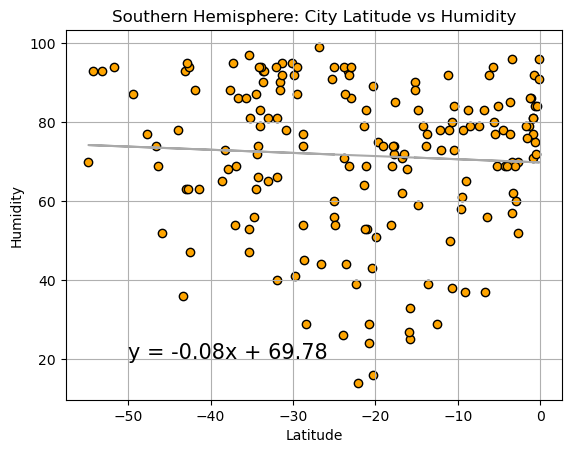

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r value is {rvalue}.")

plt.scatter(x_values, y_values, marker="o", color="orange", edgecolors="black")
plt.plot(x_values, regress_values, color="darkgrey")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: City Latitude vs Humidity')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')
plt.annotate(line_eq_s,(-50,20),fontsize=15,color="black")
print(f'The linear regression model is {line_eq_s}')

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There appears to be no correlation between the latitude and humidity in either hemisphere.However, reviewing this in the summer months (August of 2023), we see the humidity has large clusters >70% in both hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is -0.12291403536447887.
The linear regression model is y = -0.26x + 65.8


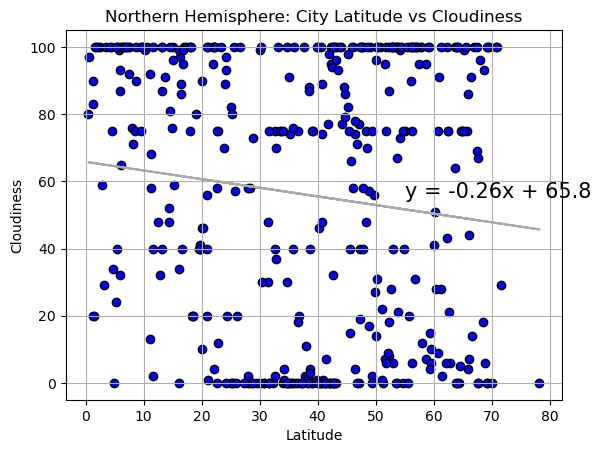

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_n = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r value is {rvalue}.")

plt.scatter(x_values, y_values, marker="o", color="blue", edgecolors="black")
plt.plot(x_values, regress_values, color="darkgrey")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: City Latitude vs Cloudiness')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')
plt.annotate(line_eq_n,(55,55),fontsize=15,color="black")
print(f'The linear regression model is {line_eq_n}')

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

The r value is -0.12919358277923135.
The linear regression model is y = -0.34x + 42.39


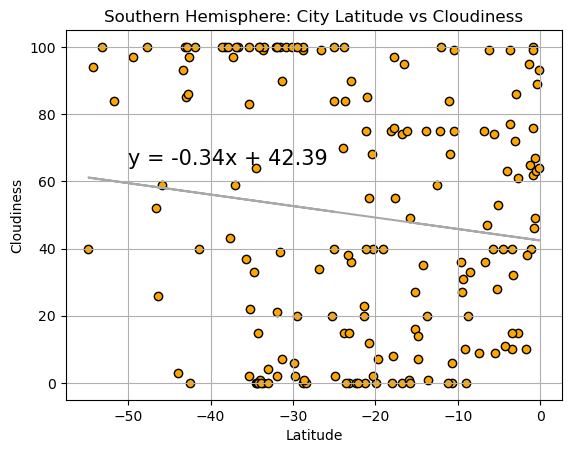

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r value is {rvalue}.")

plt.scatter(x_values, y_values, marker="o", color="orange", edgecolors="black")
plt.plot(x_values, regress_values, color="darkgrey")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: City Latitude vs Cloudiness')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')
plt.annotate(line_eq_s,(-50,65),fontsize=15,color="black")
print(f'The linear regression model is {line_eq_s}')

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There appears to be no correlation between the latitude and cloudiness in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is -0.0843937090164005.
The linear regression model is y = -0.02x + 8.74


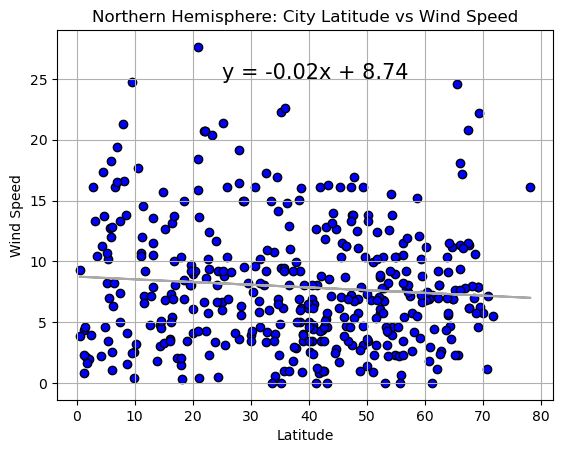

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_n = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r value is {rvalue}.")

plt.scatter(x_values, y_values, marker="o", color="blue", edgecolors="black")
plt.plot(x_values, regress_values, color="darkgrey")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: City Latitude vs Wind Speed')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')
plt.annotate(line_eq_n,(25,25),fontsize=15,color="black")
print(f'The linear regression model is {line_eq_n}')

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r value is -0.12387085218513194.
The linear regression model is y = -0.04x + 7.5


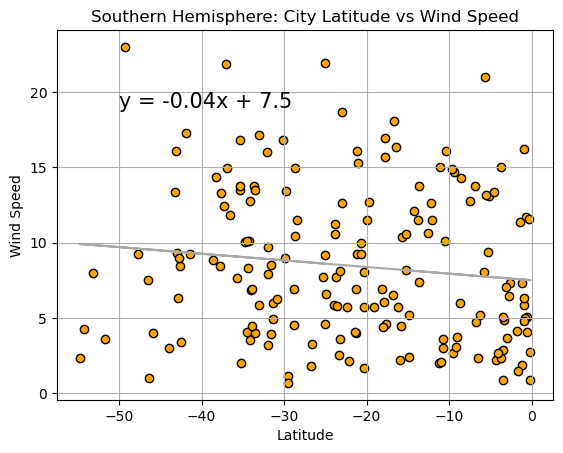

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r value is {rvalue}.")

plt.scatter(x_values, y_values, marker="o", color="orange", edgecolors="black")
plt.plot(x_values, regress_values, color="darkgrey")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: City Latitude vs Wind Speed')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')
plt.annotate(line_eq_s,(-50,19),fontsize=15,color="black")
print(f'The linear regression model is {line_eq_s}')

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There appears to be no correlation between the latitude and wind speed in either hemisphere. The wind speeds were relatively low at the time of analysis (August of 2023 at <10 mph.